In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import spacy

In [ ]:
import torch
torch.cuda.is_available()

False

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
df=pd.read_csv("/content/spam.csv", encoding='latin-1')

In [ ]:
df.sample(10)

,label,message
434,ham,You available now? I'm like right around hills...
620,ham,Dear we got &lt;#&gt; dollars hi hi
1813,ham,Yes we are chatting too.
1986,ham,S..antha num corrct dane
1543,spam,Hello from Orange. For 1 month's free access t...
1740,spam,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...
5049,ham,I will vote for wherever my heart guides me
2442,ham,I donno if they are scorable
5422,ham,Ok k..sry i knw 2 siva..tats y i askd..
2249,spam,"Thanks for your ringtone order, ref number R83..."


In [ ]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [ ]:
df.rename({"v2":"message","v1":"label"},axis=1,inplace=True)

In [ ]:
df['message'].loc[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.isnull().sum()

,0
label,0
message,0


In [ ]:
df[df.duplicated()]

,label,message


In [ ]:
df.drop_duplicates(subset='message',keep='first',inplace=True)

In [ ]:
df['label'].value_counts()

,count
label,
ham,4516
spam,653


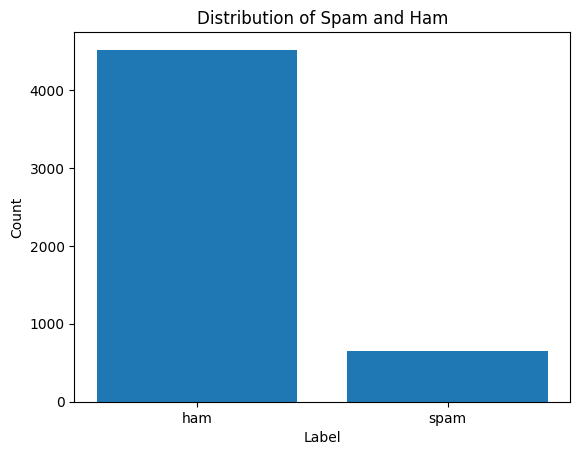

In [ ]:
plt.bar(df['label'].value_counts().index, df['label'].value_counts().values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham')
plt.show()

#Text Preprocessing

In [ ]:
import regex as re

In [ ]:
def remove_html(text):
    if isinstance(text,str):
        pattern=re.compile("<.*?>")
        return pattern.sub(" ",text)
    return text

df['message']=df['message'].apply(remove_html)

In [ ]:
def remove_url(text, replacement=""):
    url_pattern = re.compile(r'https?://\S+|www\.\S+', re.MULTILINE)
    return url_pattern.sub(replacement, text)

df['message']=df['message'].apply(remove_url)

In [ ]:
df['total_len']=df['message'].apply(len)

In [ ]:
df.head()

,label,message,total_len,word_count,sent_count
0,0,go until jurong point crazy available only in ...,111,24,2
1,0,ok lar joking wif u oni,29,8,2
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2
3,0,u dun say so early hor u c already then say,49,13,1
4,0,nah i dont think he goes to usf he lives aroun...,61,15,1


In [ ]:
def lowering(text):
    return text.lower()

In [2]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df['word_count']= df['message'].apply(lambda x : len(word_tokenize(x)))

In [ ]:
df['sent_count']=df['message'].apply(lambda x :len(sent_tokenize(x)) )

In [ ]:
df['message']=df['message'].apply(lowering)

In [ ]:
df['label']=df['label'].map({"ham":0, "spam":1})

In [3]:
import string
punctuation=string.punctuation

In [ ]:
def remove_punc(text):
    if isinstance(text,str):
        return "".join([char for char in text if char not  in punctuation])
    return text

In [ ]:
df['message']=df['message'].apply(remove_punc)

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [5]:
from nltk.stem import WordNetLemmatizer

In [6]:
lemm=WordNetLemmatizer()

In [ ]:
def transformation(text):
    if isinstance(text, str):
        nlp = spacy.load("en_core_web_sm")
        doc = nlp(text)
        tokens = word_tokenize(str(doc))

        words = []
        for token in tokens:
            token_clean = token.replace(".", "")
            if token_clean.isalnum() and token.lower() not in stopwords.words("english"):
                words.append(token)
        return words
    return text

In [ ]:
transformation("Hello World20 ** is a soumya an U.S A.I")

['Hello', 'World20', 'soumya', 'U.S', 'A.I']

In [ ]:
df['message_tokens']= df['message'].apply(transformation)

In [ ]:
df.head()

,label,message,total_len,word_count,sent_count,message_tokens
0,0,go until jurong point crazy available only in ...,111,24,2,"[go, jurong, point, crazy, available, bugis, n..."
1,0,ok lar joking wif u oni,29,8,2,"[ok, lar, joking, wif, u, oni]"
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,u dun say so early hor u c already then say,49,13,1,"[u, dun, say, early, hor, u, c, already, say]"
4,0,nah i dont think he goes to usf he lives aroun...,61,15,1,"[nah, dont, think, goes, usf, lives, around, t..."


In [ ]:
df.to_csv('spam_1.csv')

`conclusion:`

more the length of sentence - Spam

In [7]:
df1=pd.read_csv("/content/spam_1.csv")

In [11]:
df1.head(10)

,label,message,total_len,word_count,sent_count,message_tokens
0,0,go until jurong point crazy available only in ...,111,24,2,"['go', 'jurong', 'point', 'crazy', 'available'..."
1,0,ok lar joking wif u oni,29,8,2,"['ok', 'lar', 'joking', 'wif', 'u', 'oni']"
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,"['free', 'entry', '2', 'wkly', 'comp', 'win', ..."
3,0,u dun say so early hor u c already then say,49,13,1,"['u', 'dun', 'say', 'early', 'hor', 'u', 'c', ..."
4,0,nah i dont think he goes to usf he lives aroun...,61,15,1,"['nah', 'dont', 'think', 'goes', 'usf', 'lives..."
5,1,freemsg hey there darling its been 3 weeks now...,148,39,4,"['freemsg', 'hey', 'darling', '3', 'weeks', 'w..."
6,0,even my brother is not like to speak with me t...,77,18,2,"['even', 'brother', 'like', 'speak', 'treat', ..."
7,0,as per your request melle melle oru minnaminun...,160,31,2,"['per', 'request', 'melle', 'melle', 'oru', 'm..."
8,1,winner as a valued network customer you have b...,158,32,5,"['winner', 'valued', 'network', 'customer', 's..."
9,1,had your mobile 11 months or more u r entitled...,154,31,3,"['mobile', '11', 'months', 'u', 'r', 'entitled..."


In [9]:
df1.drop("Unnamed: 0",axis=1,inplace=True)

In [10]:
df1[df1['label']==1].shape

(653, 6)

#pre processing

In [ ]:
from nltk.stem.porter import PorterStemmer
import ast
ps=PorterStemmer()


In [ ]:
def stemming(text):
    if isinstance(text, str):
        try:
            text = ast.literal_eval(text)
        except:
            text = text.split()
    new_sent = [ps.stem(word) for word in text]
    return new_sent

In [ ]:
df1['message_tokens']=df1['message_tokens'].apply(stemming)

In [12]:
df1.head(10)

,label,message,total_len,word_count,sent_count,message_tokens
0,0,go until jurong point crazy available only in ...,111,24,2,"['go', 'jurong', 'point', 'crazy', 'available'..."
1,0,ok lar joking wif u oni,29,8,2,"['ok', 'lar', 'joking', 'wif', 'u', 'oni']"
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,"['free', 'entry', '2', 'wkly', 'comp', 'win', ..."
3,0,u dun say so early hor u c already then say,49,13,1,"['u', 'dun', 'say', 'early', 'hor', 'u', 'c', ..."
4,0,nah i dont think he goes to usf he lives aroun...,61,15,1,"['nah', 'dont', 'think', 'goes', 'usf', 'lives..."
5,1,freemsg hey there darling its been 3 weeks now...,148,39,4,"['freemsg', 'hey', 'darling', '3', 'weeks', 'w..."
6,0,even my brother is not like to speak with me t...,77,18,2,"['even', 'brother', 'like', 'speak', 'treat', ..."
7,0,as per your request melle melle oru minnaminun...,160,31,2,"['per', 'request', 'melle', 'melle', 'oru', 'm..."
8,1,winner as a valued network customer you have b...,158,32,5,"['winner', 'valued', 'network', 'customer', 's..."
9,1,had your mobile 11 months or more u r entitled...,154,31,3,"['mobile', '11', 'months', 'u', 'r', 'entitled..."


In [ ]:
def appending(text):
   return  " ".join([char for char in text])

In [13]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import string
punctuation=string.punctuation

In [16]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(lemm.lemmatize(i))


    return " ".join(y)

In [17]:
from tqdm.auto import tqdm
tqdm.pandas()

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
df1['transformed_text']=df1['message'].progress_apply(transform_text)

  0%|          | 0/5169 [00:00<?, ?it/s]

In [20]:
df1.sample(10)

,label,message,total_len,word_count,sent_count,message_tokens,transformed_text
3262,0,nowadays people are notixiquating the laxinorf...,274,45,3,"['nowadays', 'people', 'notixiquating', 'laxin...",nowadays people notixiquating laxinorficated o...
4336,0,havent,7,2,1,['havent'],havent
4072,0,hows the pain deary r u smiling,33,10,1,"['hows', 'pain', 'deary', 'r', 'u', 'smiling']",hows pain deary r u smiling
4873,0,hmm thinking lor,19,4,1,"['hmm', 'thinking', 'lor']",hmm thinking lor
1280,0,correct so how was work today,30,7,2,"['correct', 'work', 'today']",correct work today
155,0,hello my love what are you doing did you get t...,157,41,6,"['hello', 'love', 'get', 'interview', 'today',...",hello love get interview today happy good boy ...
1394,0,arms fine hows cardiff and uni,34,9,1,"['arms', 'fine', 'hows', 'cardiff', 'uni']",arm fine hows cardiff uni
4195,0,have good weekend,20,5,1,"['good', 'weekend']",good weekend
1841,0,ello babe u ok,15,5,1,"['ello', 'babe', 'u', 'ok']",ello babe u ok
1755,0,sian aft meeting supervisor got work 2 do liao...,67,15,1,"['sian', 'aft', 'meeting', 'supervisor', 'got'...",sian aft meeting supervisor got work 2 liao u ...


In [20]:
df1[df1['label']==1]

,label,message,total_len,word_count,sent_count,message_tokens,transformed_text
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,37,2,"['free', 'entry', '2', 'wkly', 'comp', 'win', ...",free entry 2 wkly comp win fa cup final tkts 2...
5,1,freemsg hey there darling its been 3 weeks now...,148,39,4,"['freemsg', 'hey', 'darling', '3', 'weeks', 'w...",freemsg hey darling 3 week word back id like f...
8,1,winner as a valued network customer you have b...,158,32,5,"['winner', 'valued', 'network', 'customer', 's...",winner valued network customer selected receiv...
9,1,had your mobile 11 months or more u r entitled...,154,31,3,"['mobile', '11', 'months', 'u', 'r', 'entitled...",mobile 11 month u r entitled update latest col...
11,1,six chances to win cash from 100 to 20000 poun...,136,31,3,"['six', 'chances', 'win', 'cash', '100', '2000...",six chance win cash 100 20000 pound txt csh11 ...
...,...,...,...,...,...,...,...
5137,1,want explicit sex in 30 secs ring 02073162414 ...,90,18,3,"['want', 'explicit', 'sex', '30', 'secs', 'rin...",want explicit sex 30 sec ring 02073162414 cost...
5139,1,asked 3mobile if 0870 chatlines inclu in free ...,160,38,6,"['asked', '3mobile', '0870', 'chatlines', 'inc...",asked 3mobile 0870 chatlines inclu free min in...
5146,1,had your contract mobile 11 mnths latest motor...,160,35,5,"['contract', 'mobile', '11', 'mnths', 'latest'...",contract mobile 11 mnths latest motorola nokia...
5163,1,reminder from o2 to get 250 pounds free call c...,147,30,1,"['reminder', 'o2', 'get', '250', 'pounds', 'fr...",reminder o2 get 250 pound free call credit det...


##analysis

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(df1[df1['label'] == 1]['transformed_text'].str.cat(sep=" "))

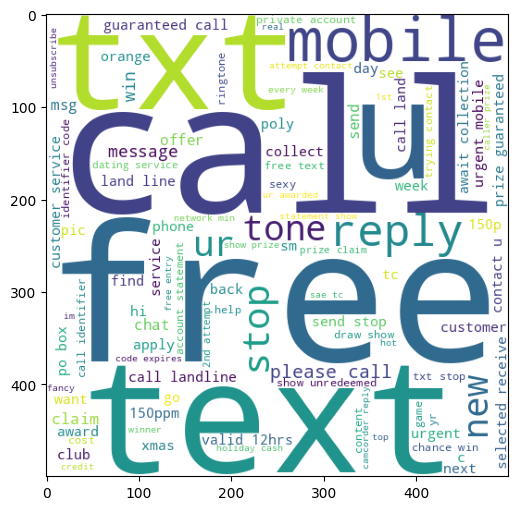

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
not_spam_wc=wc.generate(df1[df1['label']==0]['transformed_text'].str.cat(sep=" "))

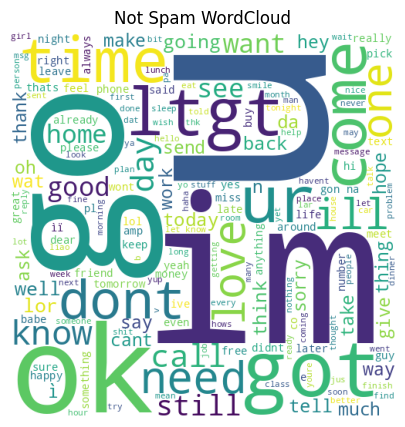

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(not_spam_wc)
plt.axis("off")
plt.title("Not Spam WordCloud")
plt.show()

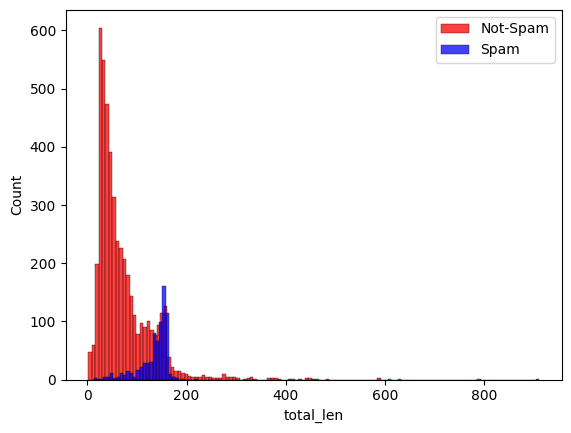

In [ ]:
sns.histplot(df[df['label']==0]['total_len'], color='red', label='Not-Spam', kde=False)
sns.histplot(df[df['label']==1]['total_len'], color='blue', label='Spam', kde=False)
plt.legend()
plt.show()

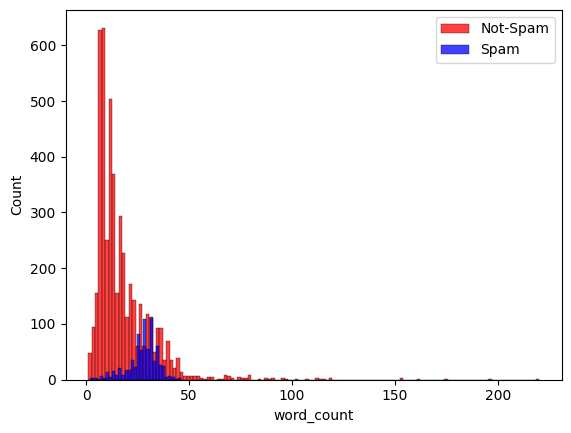

In [ ]:
sns.histplot(df[df['label']==0]['word_count'], color='red', label='Not-Spam', kde=False)
sns.histplot(df[df['label']==1]['word_count'], color='blue', label='Spam', kde=False)
plt.legend()
plt.show()

In [ ]:
spam_corpus=[]
for text in df1[df1['label']==1]['transformed_text'].to_list():
    for word in text.split():
        spam_corpus.append(word)

In [ ]:
not_spam_corpus=[]
for text in df1[df1['label']==0]['transformed_text'].to_list():
    for word in text.split():
        not_spam_corpus.append(word)

In [ ]:
from collections import Counter
spam_most_text=Counter(spam_corpus).most_common(50)

In [ ]:
not_spam_text=Counter(not_spam_corpus).most_common(50)

In [ ]:
spam_most_text

[('call', 321),
 ('free', 189),
 ('2', 155),
 ('txt', 137),
 ('u', 123),
 ('text', 121),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 103),
 ('repli', 100),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('tone', 62),
 ('send', 59),
 ('urgent', 58),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 50),
 ('week', 49),
 ('win', 48),
 ('tc', 44),
 ('collect', 44),
 ('min', 44),
 ('custom', 42),
 ('guarante', 42),
 ('messag', 41),
 ('per', 41),
 ('18', 38),
 ('16', 37),
 ('chat', 37),
 ('tri', 36),
 ('number', 35),
 ('draw', 34),
 ('show', 33),
 ('go', 33),
 ('line', 33),
 ('msg', 32),
 ('receiv', 31),
 ('today', 31),
 ('offer', 31),
 ('latest', 30),
 ('landlin', 30),
 ('want', 30)]

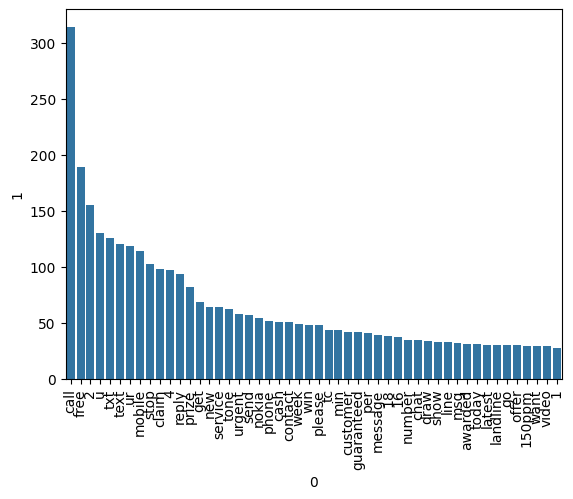

In [ ]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(50))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

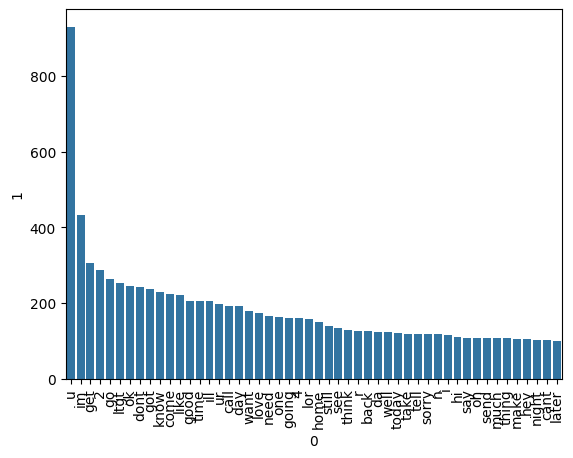

In [ ]:
sns.barplot(x=pd.DataFrame(Counter(not_spam_corpus).most_common(50))[0],y=pd.DataFrame(Counter(not_spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

#Modelling

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

1.n_grams

In [ ]:
cv=CountVectorizer(ngram_range=(1,5))

In [ ]:
X_ngrams=cv.fit_transform(df1['transformed_text']).toarray()

In [ ]:
X_ngrams.shape

(5169, 122076)

In [22]:
y=df1['label']


In [33]:
tdif=TfidfVectorizer()

In [34]:
tdif1=TfidfVectorizer(max_features=3000)

In [35]:
X_tdif=tdif.fit_transform(df1['transformed_text']).toarray()

In [36]:
X_tdif1=tdif1.fit_transform(df1['transformed_text']).toarray()

In [25]:
df1.columns

Index(['label', 'message', 'total_len', 'word_count', 'sent_count',
       'message_tokens', 'transformed_text'],
      dtype='object')

In [27]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 39.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [25]:
import gensim
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [26]:
model=gensim.models.Word2Vec(vector_size=100,window=5)

In [27]:
story=[]
for i in range(df1.shape[0]):

    story.append(simple_preprocess(df1.iloc[i]['transformed_text']))

In [28]:
story[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [29]:
model.build_vocab(story)

In [30]:
model.train(story, total_examples=model.corpus_count, epochs=100)

(3038280, 4340400)

In [37]:
model.wv.most_similar('point')

[('unredeemed', 0.7363765239715576),
 ('identifier', 0.6926059722900391),
 ('statement', 0.6729640364646912),
 ('expires', 0.5733627080917358),
 ('private', 0.552911639213562),
 ('code', 0.5477850437164307),
 ('show', 0.48598751425743103),
 ('clock', 0.43365752696990967),
 ('available', 0.42831259965896606),
 ('library', 0.42759963870048523)]

In [31]:
df1.shape

(5169, 7)

In [ ]:
model.corpus_count

5169

In [38]:
import numpy as np

In [39]:
def documentation(doc):
    x = [word  for word in doc.split() if word in model.wv.index_to_key ]
    if not x:
        return np.zeros(model.vector_size)
    else:
        return np.mean(model.wv[x],axis=0)

In [40]:
documentation(df1['transformed_text'].values[0])

array([ 0.19919005,  0.3173425 , -0.3319603 , -0.0135029 ,  0.01479916,
        0.00908037,  0.09463111, -0.15794979, -0.5851678 , -0.22136806,
        0.13010079, -0.2504215 , -0.7182996 , -0.48136356, -0.10920341,
        0.22636567,  0.03429593, -0.35093966,  0.07296108, -0.6766642 ,
        0.08712314,  0.12130485, -0.10704902, -0.1579376 , -0.3111859 ,
       -0.33777016, -0.77688336, -0.39198866, -0.08863188,  0.13687067,
        0.36839464,  0.14542998, -0.1750438 ,  0.5488925 ,  0.01515415,
       -0.0041894 ,  0.10392113,  0.16106866, -0.84786665, -0.3062743 ,
        0.07582864,  0.19135262,  0.0791564 ,  0.5653303 ,  0.15850599,
       -0.38791284, -0.31206152,  0.32278302, -0.01218271,  0.12880565,
        0.35734162, -0.42807624, -0.03947789, -0.11281908, -0.43755493,
        0.11880303, -0.28997213, -0.8460922 ,  0.11148885, -0.27727845,
        0.3912439 ,  0.15068144,  0.43235815, -0.7239925 , -0.40032777,
       -0.37262857,  0.03119199,  0.10411367,  0.16655022, -0.40

In [41]:
X_w2v=df1['transformed_text'].progress_apply(documentation)

  0%|          | 0/5169 [00:00<?, ?it/s]

In [42]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as sk_accuracy_score, f1_score as sk_f1_score, precision_score as sk_precision_score
from sklearn.base import clone
import numpy as np

def try_model(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    try:
        model1 = clone(model)
    except AttributeError:
        model1 = model

    model1.fit(x_train, y_train)

    y_pred = model1.predict(x_test)

    acc_score = sk_accuracy_score(y_test, y_pred)
    f1 = sk_f1_score(y_test, y_pred)
    precision = sk_precision_score(y_test, y_pred, average='weighted')

    return {"accracy":acc_score,"f1":f1,"Precision":precision}

In [54]:
try_model(GaussianNB(),np.array(list(X_w2v)),y)

{'accracy': 0.960348162475822,
 'f1': 0.850909090909091,
 'Precision': 0.961045219952117}

In [ ]:
try_model(GaussianNB(),np.array(X_tdif),y)

Model--> GaussianNB()
accuracy_score--> 0.8936170212765957
f1_score--> 0.6820809248554913
Precision--> 0.9244949361596757


In [ ]:
for model in [GaussianNB(),MultinomialNB(),BernoulliNB()]:
    for X_name, X in [('X_tdif', X_tdif), ('X_w2v', list(X_w2v))]:
        if isinstance(model, MultinomialNB) and X_name == 'X_w2v':
            print(f"Skipping MultinomialNB with {X_name} due to negative values.")
            print()
            continue
        try_model(model,np.array(X),y)
        print(X_name)
        print()

Model--> GaussianNB()
accuracy_score--> 0.8936170212765957
f1_score--> 0.6820809248554913
Precision--> 0.9244949361596757
X_tdif

Model--> GaussianNB()
accuracy_score--> 0.9661508704061895
f1_score--> 0.8727272727272727
Precision--> 0.9667605349098994
X_w2v

Model--> MultinomialNB()
accuracy_score--> 0.9497098646034816
f1_score--> 0.7614678899082569
Precision--> 0.9524596932476656
X_tdif

Skipping MultinomialNB with X_w2v due to negative values.

Model--> BernoulliNB()
accuracy_score--> 0.9526112185686654
f1_score--> 0.7878787878787878
Precision--> 0.95241602931048
X_tdif

Model--> BernoulliNB()
accuracy_score--> 0.9584139264990329
f1_score--> 0.8501742160278746
Precision--> 0.961416534104904
X_w2v



In [45]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 MB 3.4 MB/s eta 0:00:00


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [47]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
gnv=GaussianNB()
bnv=BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=100,random_state=2)

In [48]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    "GuasssianNv":gnv,
    "BernoulliNV":bnv,
    'DicisionTree': dtc,
    'LogisticR': lrc,
    'RandomForest': rfc,
    'AdaBoost': abc,
    'BaggingC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X,y=y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_tdif,y)

(0.9729206963249516, 0.9534883720930233)

In [55]:
accuracy_scores=[]
f1_scores=[]
precision_scores=[]
X_used=[]
clf_used=[]

for name,clf in clfs.items():
    for X_name, X in [('X_tdif', X_tdif), ('X_w2v', list(X_w2v)),('X_tdf1',X_tdif1)]:
        info=try_model(clf,X,y)
        clf_used.append(name)
        accuracy_scores.append(info['accracy'])
        f1_scores.append(info['f1'])
        precision_scores.append(info['Precision'])
        X_used.append(X_name)

In [60]:
final=pd.DataFrame({"Classifier Used":clf_used,"X_used":X_used,"Accuracy":accuracy_scores,"F1":f1_scores,"precision":precision_scores})

In [73]:
final

,Classifier Used,X_used,Accuracy,F1,precision
0,SVC,X_tdif,0.969052,0.868852,0.969148
1,SVC,X_w2v,0.791103,0.211679,0.793706
2,SVC,X_tdf1,0.967118,0.862903,0.966635
3,KN,X_tdif,0.897485,0.353659,0.908298
4,KN,X_w2v,0.973888,0.900369,0.973973
5,KN,X_tdf1,0.913926,0.508287,0.921680
6,GuasssianNv,X_tdif,0.893617,0.682081,0.924495
7,GuasssianNv,X_w2v,0.960348,0.850909,0.961045
8,GuasssianNv,X_tdf1,0.885880,0.668539,0.922630
9,BernoulliNV,X_tdif,0.952611,0.787879,0.952416


In [65]:
final[final['precision']==max(final['precision'])]

,Classifier Used,X_used,Accuracy,F1,precision
11,BernoulliNV,X_tdf1,0.975822,0.898785,0.976202


In [67]:
final[final['Accuracy']==max(final['Accuracy'])]

,Classifier Used,X_used,Accuracy,F1,precision
11,BernoulliNV,X_tdf1,0.975822,0.898785,0.976202


In [71]:
final['Accuracy'].sort_values(ascending=False)[0:3]

,Accuracy
11,0.975822
4,0.973888
34,0.973888


In [72]:
final['precision'].sort_values(ascending=False)[0:3]

,precision
11,0.976202
4,0.973973
29,0.973739


In [74]:
from sklearn.ensemble import StackingClassifier

In [ ]:
#KN
#BernalliNV
#xgb
#ETC

In [77]:
estimators=[("KN",KNeighborsClassifier()),('BernalliNV',BernoulliNB()),("Xgb",XGBClassifier(n_estimators=100)),("ETC",ExtraTreesClassifier(n_estimators=100))]

In [78]:
final_estimator=RandomForestClassifier(n_estimators=100)

In [79]:
final_model = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [82]:
from sklearn.metrics import accuracy_score, precision_score
import numpy as np

for X_name, X in [("X_tdif", X_tdif), ("X_w2v", np.array(list(X_w2v))), ("X_tdif1", X_tdif1)]:
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    final_model.fit(x_train, y_train)
    y_pred = final_model.predict(x_test)

    print("X -->", X_name)
    print("Accuracy -->", accuracy_score(y_test, y_pred))
    print("Precision -->", precision_score(y_test, y_pred))
    print()

X --> X_tdif
Accuracy --> 0.9806576402321083
Precision --> 0.9562043795620438

X --> X_w2v
Accuracy --> 0.971953578336557
Precision --> 0.9202898550724637

X --> X_tdif1
Accuracy --> 0.9806576402321083
Precision --> 0.9699248120300752



In [92]:
accuracy_score(y_test,final_model.predict(x_test))

0.753384912959381

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X_tdif1,y,test_size=0.2,random_state=42)

In [94]:
final_model1 = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [95]:
final_model1.fit(X_train,y_train)

StackingClassifier(estimators=[('KN', KNeighborsClassifier()),
                               ('BernalliNV', BernoulliNB()),
                               ('Xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None,
                                              feature_weights=None, gamma=N...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('ETC', ExtraTreesClassifier())],
                   final_estimator=RandomForestClassifier())

In [96]:
accuracy_score(y_test,final_model1.predict(X_test))

0.9816247582205029

In [97]:
precision_score(y_test, final_model1.predict(X_test))

0.9772727272727273

In [102]:
import pickle
pickle.dump(tdif1,open('vectorizer1.pkl','wb'))

In [100]:
with open("vectorizer.pkl", "rb") as f:
    v = pickle.load(f)

In [101]:
# v.transform(['"Hey, are we still meeting for lunch tomorrow?"'])

AttributeError: 'numpy.ndarray' object has no attribute 'transform'